# Regression in TensorFlow

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import h5py
warnings.resetwarnings()
warnings.simplefilter(action='ignore', category=ImportWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
warnings.simplefilter(action='ignore', category=ResourceWarning)

In [3]:
import tensorflow as tf

## Steps in fittting a model

- Define model variables (parameters) and placeholders (data)
- Define the loss function
- Choose an optimizer to minimize the loss
- Start a session
    - Initialize global variables
    - Run the optimizer for $n$ steps or epochs, feeding in appropriate data

## Linear Regression

In [4]:
np.random.seed(123)

In [5]:
N = 10
W_true = 2
b_true = 1
X_obs = np.arange(N).reshape((-1,1))
eps = np.random.normal(0, 1, (N, 1))
y_obs = np.reshape(W_true * X_obs + b_true + eps, (-1, 1))

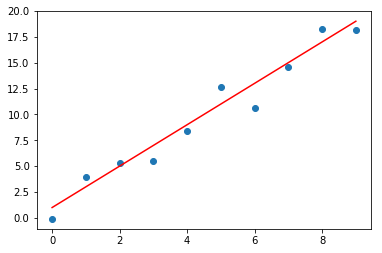

In [6]:
plt.scatter(X_obs, y_obs)
plt.plot(X_obs, W_true * X_obs + b_true, c='red')
pass

In [7]:
X = tf.placeholder(tf.float32, (N, 1))
y = tf.placeholder(tf.float32, (N, 1))
W = tf.Variable(tf.random_normal((1,1)))
b = tf.Variable(tf.random_normal((1,)))
yhat = tf.matmul(X, W) + b
loss = tf.reduce_sum(tf.square(y - yhat))

train_op = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)
init_op = tf.global_variables_initializer()

In [8]:
niter = 1001

with tf.Session() as sess:
    sess.run(init_op)
    for i in range(niter):
        _, weights, bias, l = sess.run([train_op, W, b, loss], feed_dict={X: X_obs, y: y_obs})
        if i % 100 == 0:
            print('%03d\t%6.2f\t%6.2f\t%6.2f' % (i, weights[0][0], bias[0], l))

000	  0.06	  1.35	984.14
100	  1.92	  1.25	 16.04
200	  1.95	  1.03	 15.53
300	  1.97	  0.90	 15.36
400	  1.98	  0.83	 15.31
500	  1.99	  0.79	 15.29
600	  1.99	  0.77	 15.29
700	  2.00	  0.75	 15.29
800	  2.00	  0.75	 15.28
900	  2.00	  0.74	 15.28
1000	  2.00	  0.74	 15.28


## Logistic Regression

We will use logistic regreesion to predict entry to graduate school based on GRE, GPA and rank of undegraduate college by prestige (1 = highest, 4= lowest).

In [9]:
import pandas as pd

In [10]:
df = pd.read_csv('https://stats.idre.ucla.edu/stat/data/binary.csv')

In [11]:
df.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [12]:
df = pd.get_dummies(df, columns=['rank'], drop_first=True)
df.head()

,admit,gre,gpa,rank_2,rank_3,rank_4
0,0,380,3.61,0,1,0
1,1,660,3.67,0,1,0
2,1,800,4.00,0,0,0
3,1,640,3.19,0,0,1
4,0,520,2.93,0,0,1


Reset the data flow graph.

In [13]:
N = df.shape[0]
X = tf.placeholder(tf.float32, (N, 5))
y = tf.placeholder(tf.float32, (N, 1))

W = tf.Variable(tf.random_normal((5,1)))
b = tf.Variable(tf.random_normal((1,)))

yhat = tf.matmul(X, W) + b

In [14]:
loss = tf.reduce_sum(tf.nn.sigmoid_cross_entropy_with_logits(logits=yhat, labels=y))

In [15]:
train_op = tf.train.AdamOptimizer().minimize(loss)
init_op = tf.global_variables_initializer()

In [16]:
niter = 25001

with tf.Session() as sess:
    sess.run(init_op)
    for i in range(niter):
        _, weights, bias, l = sess.run([train_op, W, b, loss], feed_dict={X: df.iloc[:, 1:], y: df.iloc[:, 0:1]})
        if i % 5000 == 0:
            print((i, weights.T[0], bias[0], l))

(0, array([-1.3257291 , -0.302939  ,  1.9480195 , -0.17506851,  0.37787107],
      dtype=float32), -0.5002541, 104295.26)
(5000, array([-0.00137983,  0.17184952,  0.4647249 , -0.5058274 , -0.73989314],
      dtype=float32), -0.38277972, 249.21332)
(10000, array([ 0.00200241,  0.35402513, -0.79581696, -1.4096469 , -1.6802471 ],
      dtype=float32), -2.1872034, 230.55487)
(15000, array([ 0.00223551,  0.74499196, -0.6892415 , -1.3469222 , -1.5659412 ],
      dtype=float32), -3.7580762, 229.27982)
(20000, array([ 0.00226194,  0.79895586, -0.67662704, -1.340773  , -1.5527016 ],
      dtype=float32), -3.9700239, 229.25891)
(25000, array([ 0.00225878,  0.80363715, -0.6757183 , -1.3404499 , -1.551768  ],
      dtype=float32), -3.9884007, 229.25922)


#### R fit for comparison

```R
## Call:
## glm(formula = admit ~ gre + gpa + rank, family = "binomial", 
##     data = mydata)
## 
## Deviance Residuals: 
##    Min      1Q  Median      3Q     Max  
## -1.627  -0.866  -0.639   1.149   2.079  
## 
## Coefficients:
##             Estimate Std. Error z value Pr(>|z|)    
## (Intercept) -3.98998    1.13995   -3.50  0.00047 ***
## gre          0.00226    0.00109    2.07  0.03847 *  
## gpa          0.80404    0.33182    2.42  0.01539 *  
## rank2       -0.67544    0.31649   -2.13  0.03283 *  
## rank3       -1.34020    0.34531   -3.88  0.00010 ***
## rank4       -1.55146    0.41783   -3.71  0.00020 ***
## ---
## Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
## 
## (Dispersion parameter for binomial family taken to be 1)
## 
##     Null deviance: 499.98  on 399  degrees of freedom
## Residual deviance: 458.52  on 394  degrees of freedom
## AIC: 470.5
## 
## Number of Fisher Scoring iterations: 4
```